<a href="https://colab.research.google.com/github/rezvanizahra/GLP/blob/main/Lenet_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of LeNet in Pytorch

In this article, I briefly describe the architecture and show how to implement LeNet-5 in PyTorch. The article assumes a general understanding of the basics of Convolutional Neural Networks, including concepts such as convolutional layers, pooling layers, fully-connected layers, etc.

LeNet-5 is a 7 layer Convolutional Neural Network, trained on grayscale images of size 32 x 32 pixels. Here, we can see the pictorial representation of LENET -5 architecture

[link text](https://)The next step is to check how the number of parameters are being calculated. Here, this formula is being used to calculate the the shape of output at each layers.

Where, nin is the input height/width, f is the filter/kernel size, p is the padding, and s is the stride.

In the architecture and the formula above we can walkaround wach and every layer of LeNet Architecture.

Layer 1 (C1): The input of an image size is 32x32 and the convolution layer is applied with 6 kernels of 5x5 size. So, according to above formula the output of C1 layer would be like of size 28×28×6.Here, we have used padding 0 and 6 kernelof 5x5 with stride of 1.

                             Output = ((32 + 0–5) / 1) + 1 = 28
                             Learning Parameters = ([ 1 x (5 x 5) x 1] + 1) x 6 filters = 156

Layer 2 (S2): Next the pooling layer of size 2×2 and the stride of 2. The output of this layer would be 14x14x6

                             Output shape = ((28 + 0–2) / 2) + 1 = 14
                             Learning Parameters = 0 ( Here we are applying pooling only from the previous layer and pooling                                                          does not have any weights and biases so it would not contain any                                                                 Learning Parameters)

Layer 3 (C3): The next step is with convolutional layer of same shape of 5x5 but with 16 kernels. So the shape at this stage would be 10×10×16.

                             Output shape = ((14 + 0–5) / 1) + 1 = 10
                             Learning Parameters = ([ 6 x (5 x 5) x 1] + 1) x 16 filters = 2416

Layer 4 (S4): The next step is with pooling of same size as previous but the shape of the output at this stage would be 5x5x16.

                             Output shape = ((10 + 0–2) / 2) + 1 = 5
                             Learning Parameters = 0 ( Here we are applying pooling only from the previous layer and pooling                                                          does not have any weights and biases so it would not contain any                                                                 Learning Parameters)

Layer 5 (C5): Next layer would be convolutional layer with 120 5×5 kernels. Here, the kernel shape is same as above but the filters are 120. Output at this layer would be 1x1x120.

                             Output shape = ((5 + 0–5) / 1) + 1 = 1
                             Learning Parameters = ([ 16 x (5 x 5) x 1] + 1) x 120 filters = 48120

Layer 6 (F6): Thi fully-connected layer takes the input of 120 and there are 84 linear neurons applied on it .This is flattern layer which in which the shape is not going to change as we are not applying padding and convolution here.

                             Learning Parameters = (120 x 84 + 84) = 10164

Layer 7 (F7): The final layer would be applied 10 Linear neurons which gives an output of size 10 and based on probebility the final output would be taken. For example, if we are working on MNIST data it would give a probebility of 0-9 and based on best matching we can take final output.

                             No of Learning Parameters = (84 x 10 + 10) = 850

# Implementation of LeNet with Pytorch

# Import all required libraries

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        #Here, we are plementing those layers which are having learnable parameters.
        #Start implementation of Layer 1 (C1) which has 6 kernels of size 5x5 with padding 0 and stride 1
        
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5),padding=0,stride=1)
        
        #Start implementation of Layer 3 (C3) which has 16 kernels of size 5x5 with padding 0 and stride 1
        
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16,kernel_size = (5,5),padding=0,stride=1)
        
        #Start implementation of Layer 5 (C5) which is basically flattening the data 
            
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120,kernel_size = (5,5),padding=0,stride=1)
        
        #Start implementation of Layer 6 (F6) which has 85 Linear Neurons and input of 120
        
        self.L1 = nn.Linear(120,84)
        
        #Start implementation of Layer 7 (F7) which has 10 Linear Neurons and input of 84
        
        self.L2 = nn.Linear(84,10)
        
        #We have used pooling of size 2 and stride 2 in this architecture 
        
        self.pool = nn.AvgPool2d(kernel_size = 2, stride = 2)
        
        #We have used tanh as an activation function in this architecture so we will use tanh at all layers excluding F7.
        self.act = nn.Tanh()
        
    #Now we will implement forward function to produce entire flow of the architecture.
    
    def forward(self,x):
        x = self.conv1(x)
        #We have used tanh as an activation function in this architecture so we will use tanh at all layers excluding F7.
        x = self.act(x)
        #Now this will be passed from pooling 
        x = self.pool(x)
        #Next stage is convolution
        x = self.conv2(x)
        x = self.act(x)
        x = self.pool(x)
        #next we will pass from conv3, here we will not pass data from pooling as per Architecture 
        x = self.conv3(x)
        x = self.act(x)
        
        #Now the data should be flaten and it would be passed from FC layers. 
        x = x.view(x.size()[0], -1)
        x = self.L1(x)
        x = self.act(x)
        x = self.L2(x)
        
        
        return x
    


In [ ]:
x = torch.randn(1,1,32,32)

In [ ]:
model = LeNet()
output = model(x)

In [ ]:
print(output.shape)

torch.Size([1, 10])


In [ ]:
print(model)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (L1): Linear(in_features=120, out_features=84, bias=True)
  (L2): Linear(in_features=84, out_features=10, bias=True)
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (act): Tanh()
)


In [ ]:
summary(model,(1, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
              Tanh-2            [-1, 6, 28, 28]               0
         AvgPool2d-3            [-1, 6, 14, 14]               0
            Conv2d-4           [-1, 16, 10, 10]           2,416
              Tanh-5           [-1, 16, 10, 10]               0
         AvgPool2d-6             [-1, 16, 5, 5]               0
            Conv2d-7            [-1, 120, 1, 1]          48,120
              Tanh-8            [-1, 120, 1, 1]               0
            Linear-9                   [-1, 84]          10,164
             Tanh-10                   [-1, 84]               0
           Linear-11                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/ba

# Now lets test our model on MNIST Dataset

In [ ]:
#We are tesing our model on MNIST dataset which is 1x28x28 insize so we have to change C5 layer in FC layer becasue at this stage 
#pixel size would be 16x5x5 so we can not apply kernel of 5x5 

class LeNet_MNIST(nn.Module):
    def __init__(self):
        super(LeNet_MNIST,self).__init__()
        #Here, we are plementing those layers which are having learnable parameters.
        #Start implementation of Layer 1 (C1) which has 6 kernels of size 5x5 with padding 0 and stride 1
        
        self.conv1 = nn.Conv2d(in_channels=1,out_channels=6,kernel_size=(5,5))
        
        #Start implementation of Layer 3 (C3) which has 16 kernels of size 5x5 with padding 0 and stride 1
        
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16,kernel_size = (5,5))
        
        #Start implementation of Layer 5 (C5) which is basically flattening the data 
            
        self.L1 = nn.Linear(256, 120)
        
        #Start implementation of Layer 6 (F6) which has 85 Linear Neurons and input of 120
        
        self.L2 = nn.Linear(120,84)
        
        #Start implementation of Layer 7 (F7) which has 10 Linear Neurons and input of 84
        
        self.L3 = nn.Linear(84,10)
        
        #We have used pooling of size 2 and stride 2 in this architecture 
        
        self.pool = nn.AvgPool2d(kernel_size = 2, stride = 2)
        
        #We have used tanh as an activation function in this architecture so we will use tanh at all layers excluding F7.
        self.act = nn.Tanh()
        
    #Now we will implement forward function to produce entire flow of the architecture.
    
    def forward(self,x):
        x = self.conv1(x)
        #We have used tanh as an activation function in this architecture so we will use tanh at all layers excluding F7.
        x = self.act(x)
        #Now this will be passed from pooling 
        x = self.pool(x)
        #Next stage is convolution
        x = self.conv2(x)
        x = self.act(x)
        x = self.pool(x)
        #next we will pass from conv3, here we will not pass data from pooling as per Architecture 
        
        
        #Now the data should be flaten and it would be passed from FC layers. 
        x = x.view(x.size()[0], -1)
        x = self.L1(x)
        x = self.act(x)
        x = self.L2(x)
        x = self.act(x)
        x = self.L3(x)
        
        return x
    


In [ ]:
model = LeNet_MNIST()

In [ ]:
import torchvision.datasets as datasets
import torch.optim as optim
import torch.nn.functional as F
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import numpy as np

In [ ]:
train = datasets.MNIST(root='data',train=True,transform=ToTensor(),download=True)
test = datasets.MNIST(root='data',train=False,transform=ToTensor(),download=True)

In [ ]:
batch_size = 128
train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test,batch_size=batch_size,shuffle=False)

In [ ]:
learning_rate = 0.002
optimizer = optim.Adam(model.parameters(),lr=learning_rate)
loss_fn = torch.nn.CrossEntropyLoss(reduction='sum')

In [ ]:
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
example_data.shape

torch.Size([128, 1, 28, 28])

In [ ]:
output = model(example_data)
output.shape

torch.Size([128, 10])

In [ ]:
def accuracy(outputs,labels):
    _,pred = torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(pred==labels).item()/len(pred))

In [ ]:
def training_step(batch):
            image,label = batch
            out = model(image)
            loss = loss_fn(out,label)
            return loss
    
def test_step(batch):
            image,label = batch
            out = model(image)
            loss = loss_fn(out,label)
            acc = accuracy(out, label)
            return {'test_loss': loss.detach(), 'test_acc': acc}
    
def training_result(outputs):
            batch_loss = [i['test_loss'] for i in outputs]
            epoch_loss = torch.stack(batch_loss).mean()
            batch_acc = [i['test_acc'] for i in outputs]
            epoch_acc = torch.stack(batch_acc).mean()  
            return {'test_loss': epoch_loss.item(), 'test_acc': epoch_acc.item()}
    
def epoch_result(epoch,result):
            print("Epoch [{}], train_loss: {:.4f}, test_loss: {:.4f}, test_acc: {:.4f}".format(
                epoch, result['train_loss'], result['test_loss'], result['test_acc']))

In [ ]:
for image,labels in train_loader:
    print(image.shape)
    out = model(image)
    print(out.shape)
    print(out[0])
    break

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])
tensor([ 0.0121,  0.0673, -0.0532,  0.0214,  0.0425,  0.1034,  0.0344,  0.0387,
        -0.0499, -0.0629], grad_fn=<SelectBackward0>)


In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return 'cpu'
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

'cpu'

In [ ]:
train_dl = DeviceDataLoader(train_loader, device)
test_dl = DeviceDataLoader(test_loader, device)
to_device(model, device);

In [ ]:
def evaluation(model,test_loader):
    model.eval()
    output = [test_step(batch) for batch in test_loader] 
    return training_result(output)

In [ ]:
def fit(epochs,model,lr,train_loader,test_loader,optim = optimizer):
    history = []
    for epoch in range(epochs):
        train_loss = []
        model.train()
        for batch in train_loader:
            loss = training_step(batch)
            train_loss.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluation(model,test_loader)
        result['train_loss'] = torch.stack(train_loss).mean().item()
        epoch_result(epoch,result)
        history.append(result)
    return history
            

In [ ]:
evaluation(model,test_loader)

{'test_acc': 0.07367484271526337, 'test_loss': 291.8251037597656}

In [ ]:
num_epochs = 30
#opt_fun = torch.optim.Adam()
lr = learning_rate

In [ ]:
history = fit(num_epochs,model,lr, train_dl, test_dl, optim=optimizer)

Epoch [0], train_loss: 38.4265, test_loss: 17.3039, test_acc: 0.9581
Epoch [1], train_loss: 12.3931, test_loss: 10.2163, test_acc: 0.9736
Epoch [2], train_loss: 8.4000, test_loss: 7.9248, test_acc: 0.9792
Epoch [3], train_loss: 6.6306, test_loss: 7.0688, test_acc: 0.9837
Epoch [4], train_loss: 5.0973, test_loss: 6.7198, test_acc: 0.9832
Epoch [5], train_loss: 4.2794, test_loss: 7.2248, test_acc: 0.9817
Epoch [6], train_loss: 3.5355, test_loss: 6.5276, test_acc: 0.9836
Epoch [7], train_loss: 2.8608, test_loss: 7.3552, test_acc: 0.9832
Epoch [8], train_loss: 2.7148, test_loss: 6.9433, test_acc: 0.9832
Epoch [9], train_loss: 2.1658, test_loss: 6.3175, test_acc: 0.9851
Epoch [10], train_loss: 2.4070, test_loss: 6.3807, test_acc: 0.9855
Epoch [11], train_loss: 1.9472, test_loss: 6.6543, test_acc: 0.9850
Epoch [12], train_loss: 1.6052, test_loss: 6.9316, test_acc: 0.9834
Epoch [13], train_loss: 1.6525, test_loss: 6.9776, test_acc: 0.9849
Epoch [14], train_loss: 1.4029, test_loss: 6.8784, tes

We can further train our model or we can tune hyperparameters like learning rate, optimizer, also we can change activation function.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_losses(history):
    losses = [x['test_loss'] for x in history]
    plt.plot(losses,'-x')
    plt.xlabel('Epochs')
    plt.ylabel('Test_Loss')
    plt.title("Epochs V/S Test Loss")

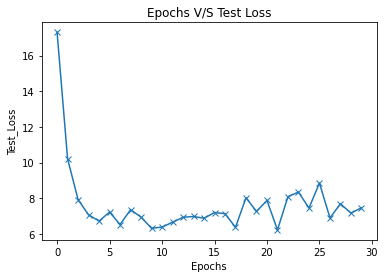

In [ ]:
plot_losses(history)

In [ ]:
evaluation(model, test_loader)

{'test_acc': 0.9866495132446289, 'test_loss': 7.4623565673828125}

In [ ]:
torch.save(model.state_dict(),'MNIST.pth')

# Testing with individual images

In [ ]:
def test_image(img,model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    
    _,pred = torch.max(yb,dim=1)
    
    return train.classes[pred[0].item()]

Label: 7


'7 - seven'

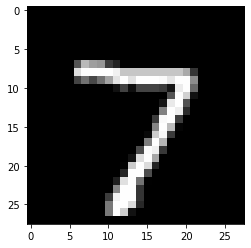

In [ ]:
img, label = test[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label)
test_image(img,model)

Label: 6


'6 - six'

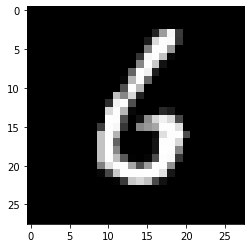

In [ ]:
img, label = test[50]
plt.imshow(img[0], cmap='gray')
print('Label:', label)
test_image(img,model)

Label: 0


'0 - zero'

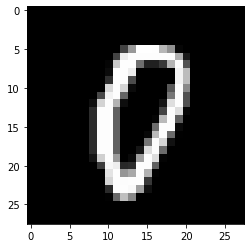

In [ ]:
img, label = test[498]
plt.imshow(img[0], cmap='gray')
print('Label:', label)
test_image(img,model)

Here we can see our model can predict correct values